In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . tree import DecisionTreeClassifier
from sklearn . metrics import accuracy_score , classification_report
from sklearn . tree import plot_tree


In [4]:
df_tyt = sns.load_dataset("titanic")

In [11]:
df = df_tyt[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked','survived']]

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [16]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True


In [17]:
X=df.drop('survived', axis=1)
y=df['survived']

X_train , X_test , y_train , y_test = train_test_split (X, y, test_size =0.3, random_state =420)

In [30]:
clf = DecisionTreeClassifier ( max_depth =3 , random_state =42)
clf . fit ( X_train , y_train )

DecisionTreeClassifier(max_depth=3, random_state=42)

In [31]:
y_pred = clf . predict ( X_test )
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))
print("Dokladnosc:", accuracy_score(y_test, y_pred))

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       157
           1       0.84      0.75      0.79       111

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.83       268

Dokladnosc: 0.835820895522388


Najlepsze wyniki dla max_depth = 3

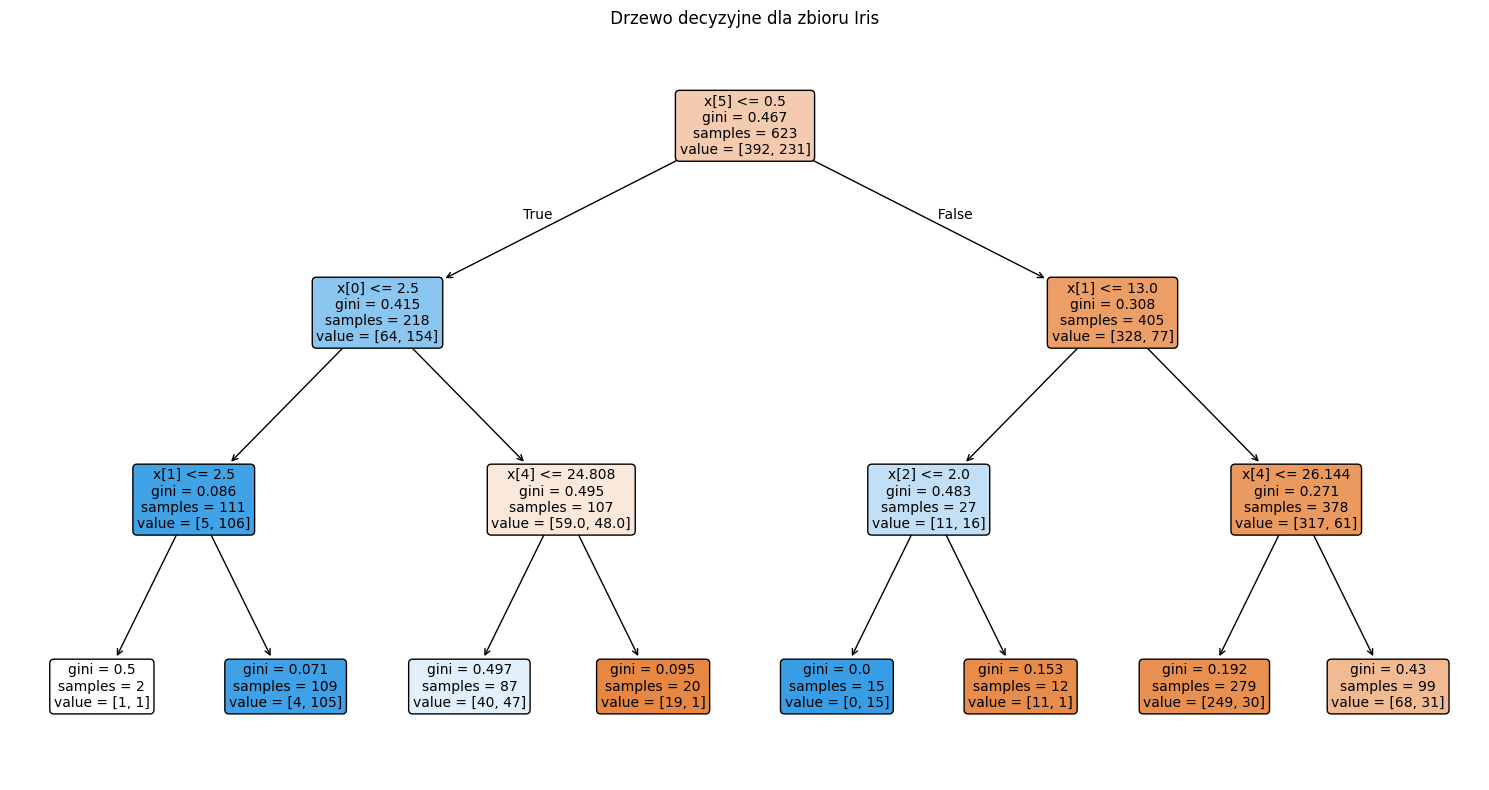

In [34]:
plt . figure ( figsize =(15 , 8) )
plot_tree ( clf ,
filled = True ,
rounded = True ,
fontsize =10)
plt . title (" Drzewo decyzyjne dla zbioru Iris ")
plt . tight_layout ()

KNN

In [41]:
from sklearn . neighbors import KNeighborsClassifier
from sklearn . preprocessing import StandardScaler

# Impute missing 'age' values with the median before scaling
X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()

# Use .loc to avoid the FutureWarning with chained assignment
X_train_imputed.loc[:, 'age'] = X_train_imputed['age'].fillna(X_train_imputed['age'].median())
X_test_imputed.loc[:, 'age'] = X_test_imputed['age'].fillna(X_train_imputed['age'].median()) # Use median from training set

scaler = StandardScaler ()
X_train_scaled = scaler . fit_transform (X_train_imputed)
X_test_scaled = scaler . transform (X_test_imputed)

In [54]:
knn = KNeighborsClassifier( n_neighbors =14 , metric ='euclidean')
knn . fit( X_train_scaled , y_train )

y_pred_knn = knn . predict( X_test_scaled )

print (" Dokladnosc KNN :", accuracy_score ( y_test , y_pred_knn ) )

 Dokladnosc KNN : 0.832089552238806


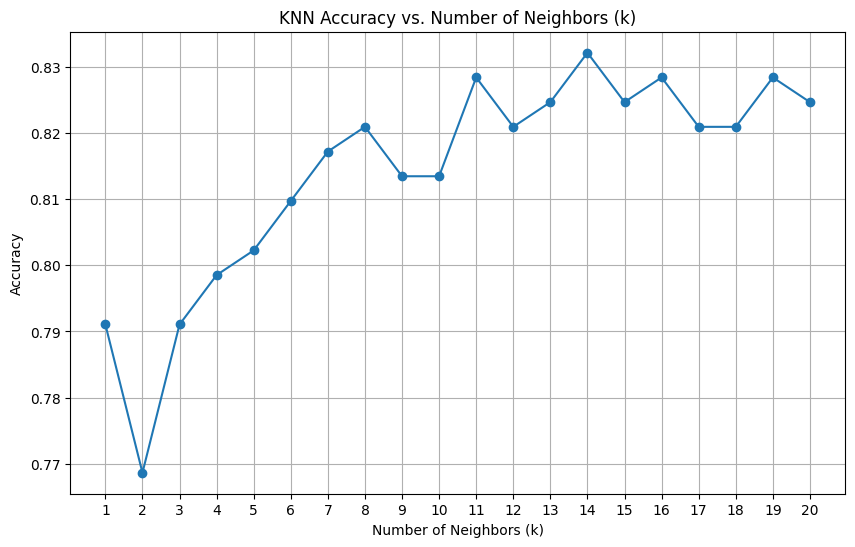

In [53]:
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_knn))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Optymalne k = 14